# Imports

In [102]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Definitions

In [103]:
img_file = (
    "/Users/richardcollins/palette-able-images/data/test_images/jonny_cropped.jpg"
)

# Functions

In [104]:
def resize_image_cv2(img_file, dims):
    img = cv2.imread(img_file)
    print("Original Dimensions: {}".format(img.shape))
    resized = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    print("Resized Dimensions: {}".format(resized.shape))
    return resized


def resize_image_pillow(img, dims):
    print("Original Dimensions: {}".format(img.size))
    resized = img.resize(dims)
    print("Resized Dimensions: {}".format(resized.size))
    return resized


def reduce_colours(img, nColours):
    image_pbn = img.convert("P", palette=Image.ADAPTIVE, colors=nColours)
    # image_pbn.save("/Users/richardcollins/Desktop/jonny/images/jonny_cropped_resized_pbn.png")
    # image_pbn.show()
    return image_pbn


def get_palette_info(img):
    palette_colours = img.getcolors()
    # print(palette_colours)
    imgRGB = img.convert("RGB")
    rgb_colours = imgRGB.getcolors()
    # print(rgb_colours)
    palette_info_dict = {c: [] for c in ["colourID", "frequency", "r", "g", "b"]}
    for palette_freq, palette_colour in palette_colours:
        for rgb_freq, rgb_colour in rgb_colours:
            if palette_freq != rgb_freq:
                continue

            palette_info_dict["colourID"].append(palette_colour)
            palette_info_dict["frequency"].append(rgb_freq)
            for i, colour in enumerate(["r", "g", "b"]):
                palette_info_dict[colour].append(rgb_colour[i])
    palette_info_df = pd.DataFrame(palette_info_dict)
    ### Generate example images
    """w, h = 512, 512
    for palette_colour, rgb_colour in palette_info.items():
        r, g, b = rgb_colour[0], rgb_colour[1], rgb_colour[2]
        data = np.zeros((h, w, 3), dtype=np.uint8)
        data[:, :] = [r, g, b]  # red patch in upper left
        img = Image.fromarray(data, "RGB")
        img.save(
            "/Users/richardcollins/Desktop/jonny/images/palette/colour{0}_rgb{1}.png".format(
                palette_colour, rgb_colour
            )
        )"""
    return palette_info_df


def quantise_to_palette(img, palette):
    """Quantize image to a given palette.

    The input image is expected to be a PIL Image.
    The palette is expected to be a list of no more than 256 R,G,B values."""

    e = len(palette)
    assert e > 0, "Palette unexpectedly short"
    assert e <= 768, "Palette unexpectedly long"
    assert e % 3 == 0, "Palette not multiple of 3, so not RGB"

    # Make tiny, 1x1 new palette image
    p = Image.new("P", (1, 1))

    # Zero-pad the palette to 256 RGB colours, i.e. 768 values and apply to image
    palette += (768 - e) * [0]
    p.putpalette(palette)

    # Now quantize input image to the same palette as our little image
    return img.convert("RGB").quantize(palette=p)

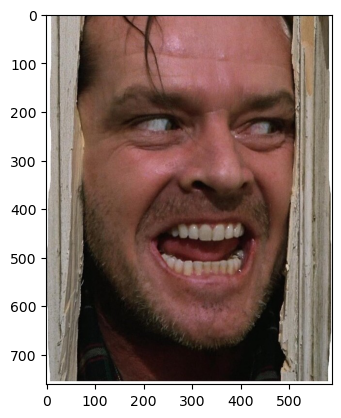

In [105]:
original = Image.open(img_file)
plt.imshow(original)
plt.show()

In [106]:
resized = resize_image_pillow(img=original, dims=(59, 76))

Original Dimensions: (588, 761)
Resized Dimensions: (59, 76)


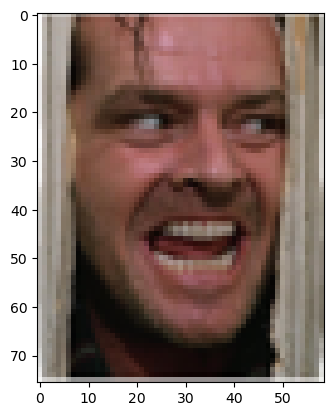

In [107]:
plt.imshow(resized)
plt.show()

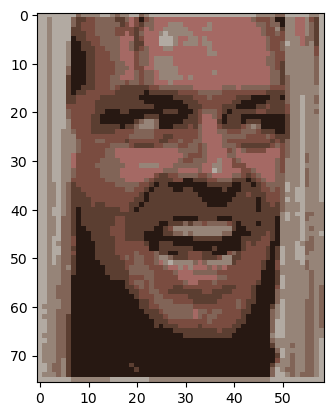

In [108]:
image_pbn = reduce_colours(img=resized, nColours=7)
plt.imshow(image_pbn)
plt.show()

In [109]:
get_palette_info(img=image_pbn)

,colourID,frequency,r,g,b
0,0,452,178,170,162
1,1,716,150,132,120
2,2,490,165,105,100
3,3,552,129,100,87
4,4,641,122,76,64
5,5,727,91,62,49
6,6,906,39,24,18


In [110]:
np.array(image_pbn.getpalette()).reshape(256,3)

array([[178, 170, 162],
       [150, 132, 120],
       [165, 105, 100],
       [129, 100,  87],
       [122,  76,  64],
       [ 91,  62,  49],
       [ 39,  24,  18],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

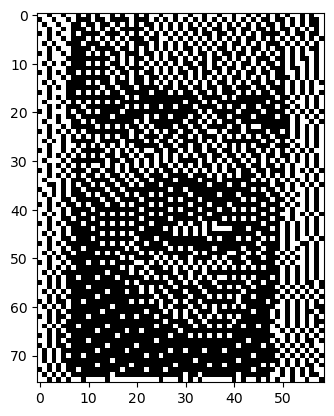

In [111]:
new_palette = list(np.array([[0, 0, 0], [255, 255, 255]]).flatten())
image_new_palette = quantise_to_palette(img=image_pbn, palette=new_palette)
plt.imshow(image_new_palette)
plt.show()